# Week 1

## What is Scientific Visualization?

- visualization can mean many things
- data visualization
  - refers to visual techniques used to present information to other people
  - Charles Minard's chart: shows Napoleonic France's invasion of Russia
- information visualization
  - refers to the idea of displaying information that does not have some inherent spacial visual form
  - not a map or some physical space
  - for example, a graph showing shared scenes of characters in a novel
- scientific visualization
  - using visual techniques to display information that does have some sort of spatial or physical form
- distinction between information viz and scientific viz is not hard and fast: one is not necessarily not the other
  - the fields are more similar than different
- visual analytics
  - focuses on how to create computational tools for data analysis that use visualization
  - like a tool that allows you to make decisions about warranty information
- Topics for this semester
  - terrain visualization
    - visualization of global surface water temperature, for example
  - volume visualization
    - a simulation of a supernova
    - allows us to see many layers, trying to visualize some 3d space that is filled with a scalar field without obscuring anything
  - Isosurfaces
    - seeing bone in an MRI
  - flow visualization
    - moves from scalar to vector
  - tensor field visualization
    - tensors are sort of a generalization of vectors
    - at a point in space, information about something going in all directions (tensor)
    - can be applied in brain MRI's with tractography
  - bioinformatics visualization
    - comparing and exploring 2D genomic contact matrices

## The Purposes of Visualization

- this section was very visual, going through different visualizations used during the COVID-19 pandemic

## Representing Color

- how do digital display devices display images.. and how do we tell those devices what images to show us?
- most modern screens use a raster grid
  - a raster is a grid
  - a pixel is the smallest element in that raster
- most displays use LCD or OLED technology
  - Liquid Crystal Display, transmissive using a light-emitting diode backlight
  - Oranic Light Emitting Diode, uses emissive organic film to generate light
- 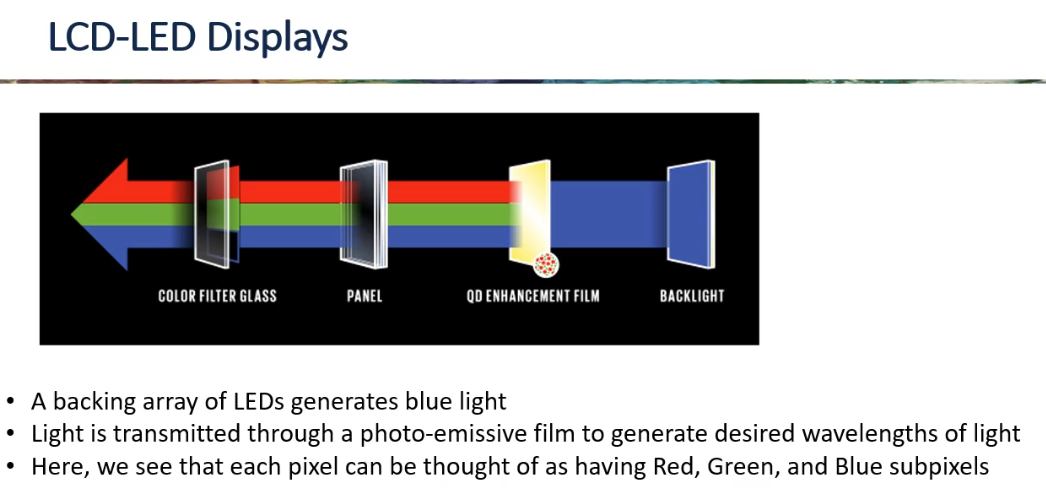
- 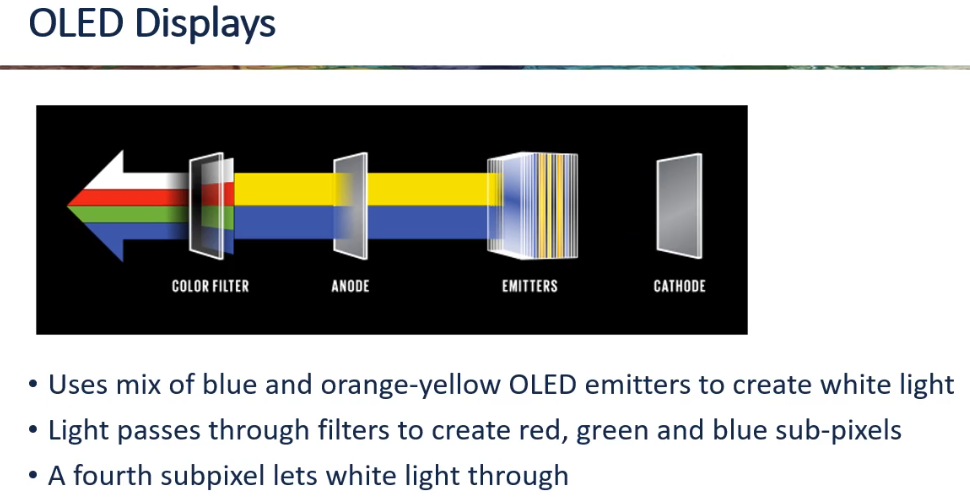
- Comparison between the two
  - OLED has deeper black levels, excellent viewing angle, fast refresh, can be manufactured on flexible substrates
  - LCD-LED is cheaper and more energy efficient
- RGB Color Space
  - emissive displays typicall use an RGB space to specify colors
  - R G and B are called primaries
  - each corresponds to a specific wavelength of light
  - R G and B are color channels
  - value of a channel is its intensity
- Sometimes there is a fourth channel called alpha (the opacity of the pixel)
- Operations on colors
  - turning on multiple lights could be just adding RGB values together to make white light
  - light off is subtracting RGB values
  - reflection would be multiplication

## Representing Intensity

- at display time, intensity values are in 8-bit representations
  - 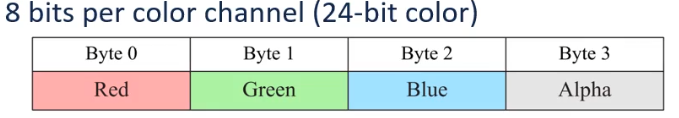
  - each channel is an 8-bit unsigned integer
  - will sometimes see hexadecimal expressions for a color range
- 256 values is a poor fit for human perception in color
- HDR uses 10 or 12 bits per color channel
- OpenEXR uses 16 bit floating point for each channel
- In application level code, keep color values as at least 32 bit floats
  - reduces impact of quantization on colors
  - reduction of precision will happen on GPU
  - 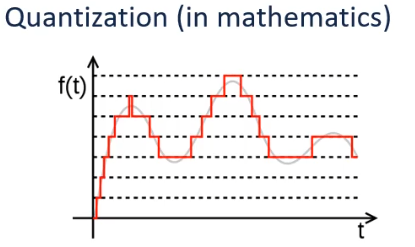
- We cannot be sure viewers will see the same colors that you compute
  - display differences
  - quantization in storage and/ or transmission to display
- If you map values to color, allow users to query for the original numerical value

## The HSV Color Space

- equivalent to RGB in terms of the color it can express, but can be easier to use in certain color picking or color generation applications
- 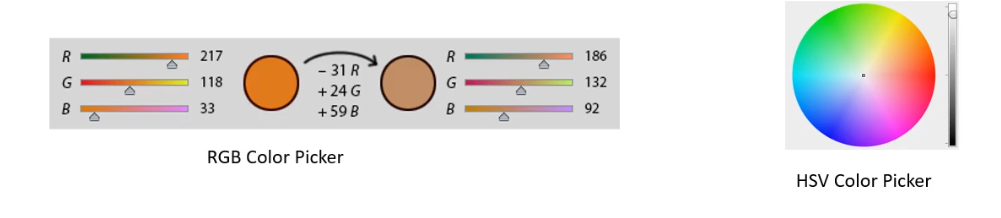
- It is hard to pick color in RGB, but easy in HSV
- Hue, Saturation, Value (HSV)
- Hue is an angle about the color wheel
- Saturation is a distance from gray
- Value is a distance from black
- 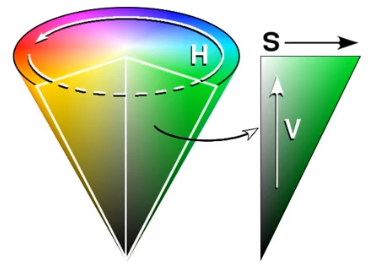
- RGB to HSV conversion
  - 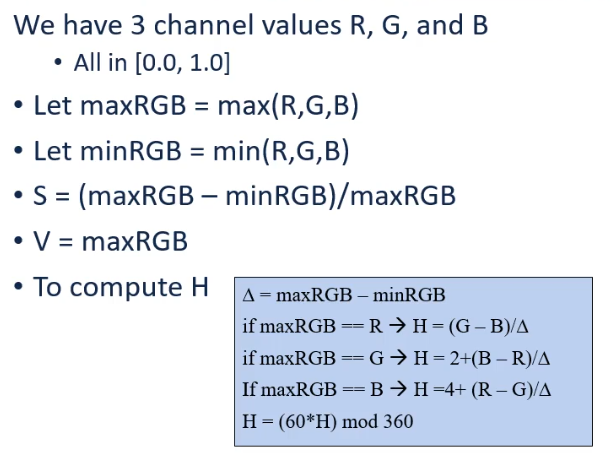
  - 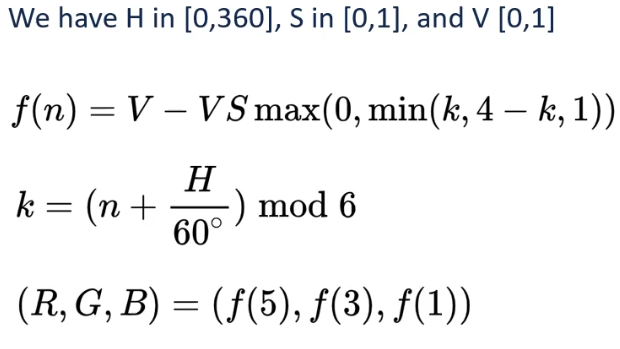
- Color spaces: lies your kindergarten teacher told you
  - red yellow and blue are not the primary colors
    - cyan, magenta, yellow.. used for reflective displays
    - printing.. or finger painting
  - any set of wavelengths can serve as primaries
    - some combinations generate more colors, some fewer
  - a 3 wavelength color space cannot produce all the colors a person can see

## Perceptual Color Spaces

- color is a perceptual phenomenon
  - not a physical property or material of light
- Rods and Cones
  - rods measure intensity
  - 80 million rods, 5 million cones
  - rods are sensitive, and shut down in daylight
  - with our 3 types of cones, we can see 150 different hues and 7 million
- Cone cell response
  - 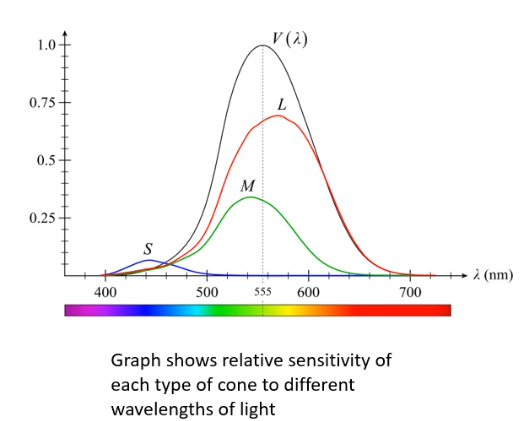
- way more L cones than there are M cones and S cones
- The human visual system
  - color corresponds to some amount of stimulus of cones
  - light is usually a mix of wavelengths
  - two different distributions can produce the same stimulus (metamers)
- Color space with physical meaning
  - choose 3 discrete wavelengths which we call primaries
  - 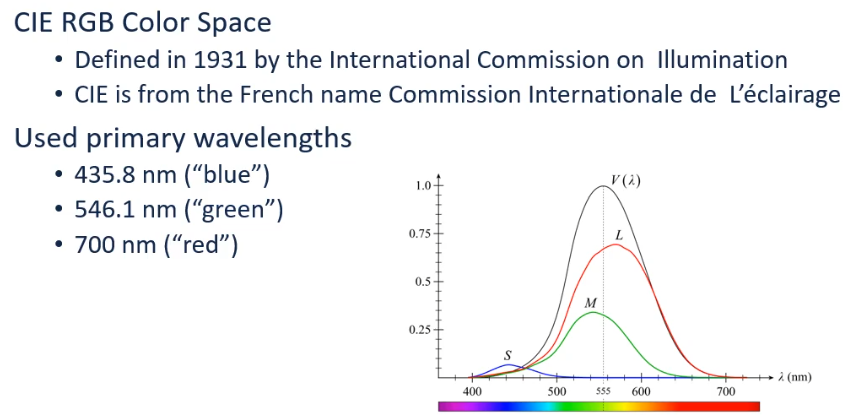
  - then do color matching experiments
  - 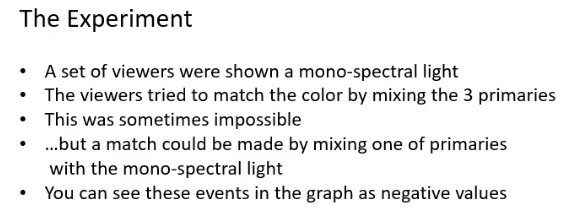
  - 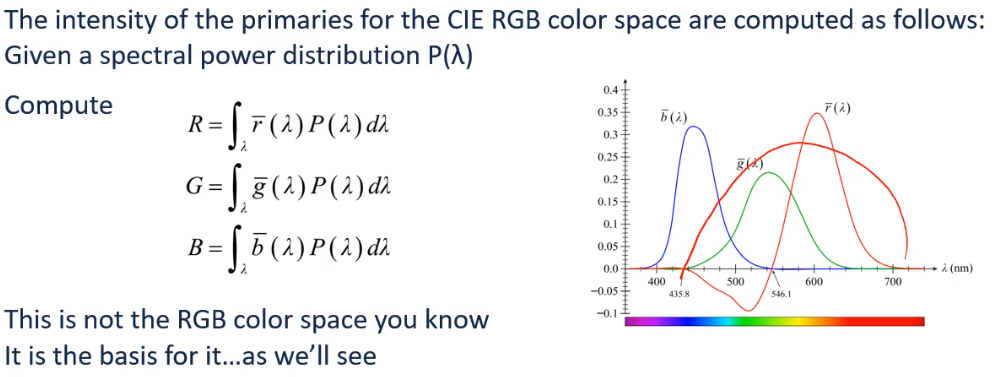
  - CIE RBG has a couple of problems
    - possible to have negative values
    - it would be helpful to separate perceived luminance from chomaticity
  - enter the CIE XYZ color space
    - 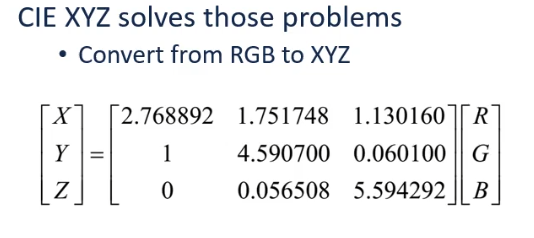
    - mapped with this matrix
  - xyY color space
    - 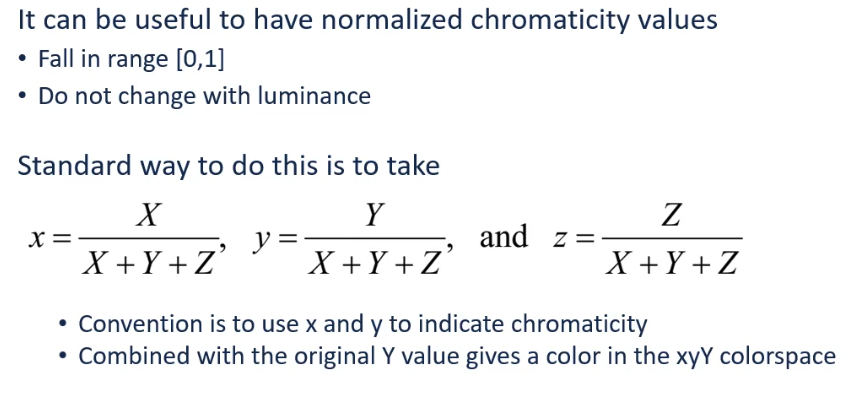
- standard illuminants
  - so what point on the diagram corresponds to white light?
    - perfect white light occurs at (1/3,1/3)
    - that is the standard illuminant E
  - most light sources are not perfectly white
  - illuminant D65 is at (0.3127,0.2390)
    - approximates average daylight in most geographic locations
    - defines white light for the sRGB color space

## The sRGB Color Space

- the most widely used digital color space today
- created by Microsoft and HP
- "s" stands for standard
- comes from CIE XYZ space
- 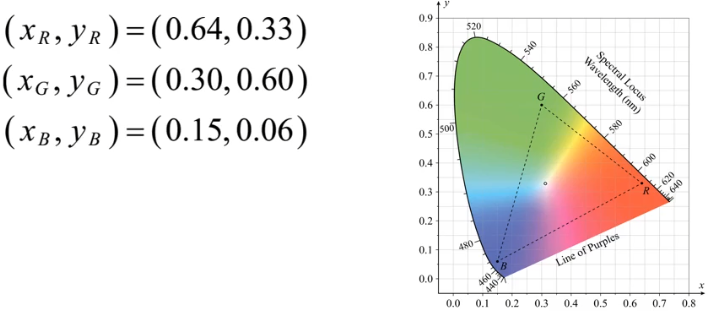
- We can compute the luminance for the primaries by knowing that the sum should be (1, 1, 1)
- 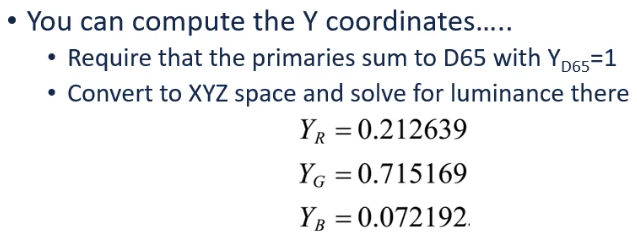
- conversion from XYZ to RGB?
  - 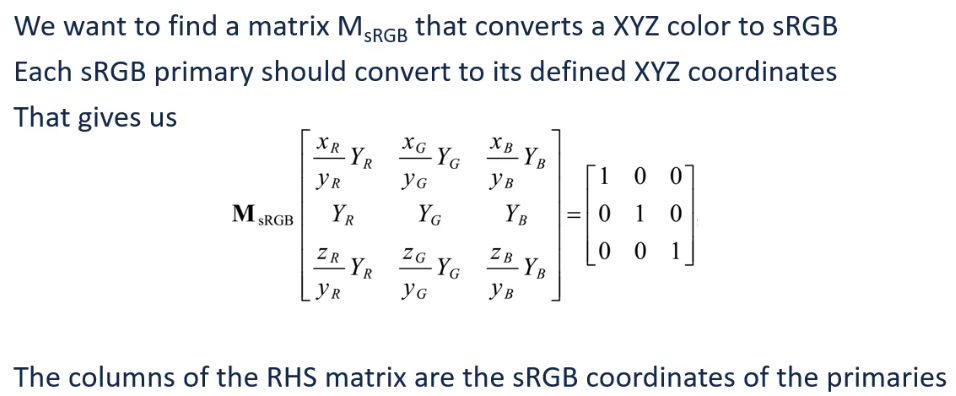
  - this assumes the color is capable of being shown in both color spaces
  - in the matrix equation, we want to solve for M_sRGB
  - substitute in the green primary values and get the following..
    - 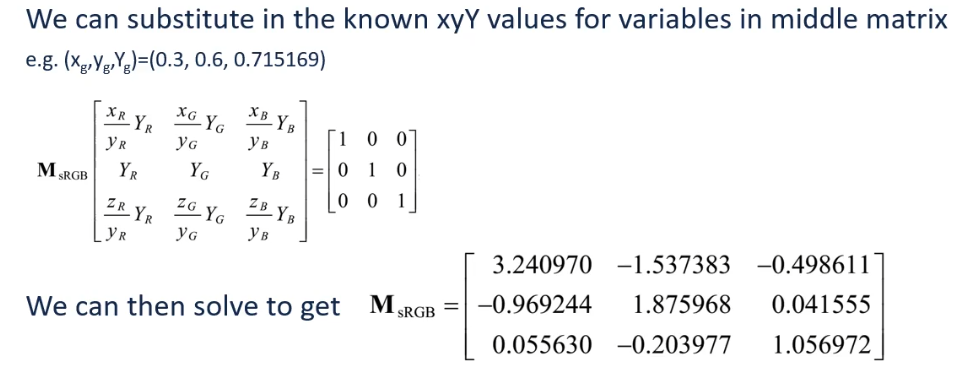
- to convert from sRGB to XYZ, just use the inverse of the matrix we just solved for
- summary: sRGB is the standard and most widely used. Assume RGB images are really just sRGB. Defined in the CIE RGB space.

## Gamma Correction

- simple idea: brightening intensity values within colors
- The brightness of a subpixel was a non-linear function of the input brightness in the CRT days
  - 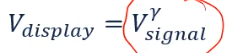
  - taking an intensity value in the range 0 to 1 and raising it to some positive power, so the displayed colors will be darker than the input color
  - we can fix this by using gamma correction
  - 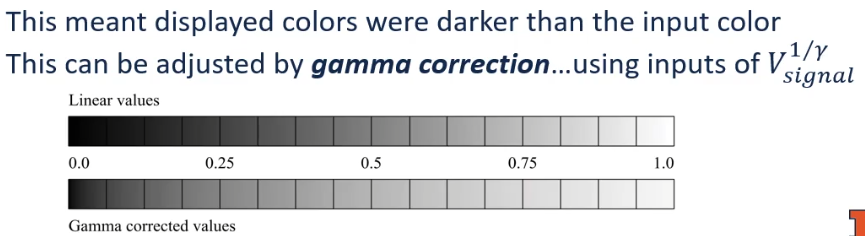
- It is not clear if the CRT gamma was an unavoidable feature or a design choice
- LCD-LEDs do not have to use gamma
  - most do, most use 2.2 as the gamma value
  - gamma values will vary by display
- sRGB standard uses gamma and specifies its own curve
- 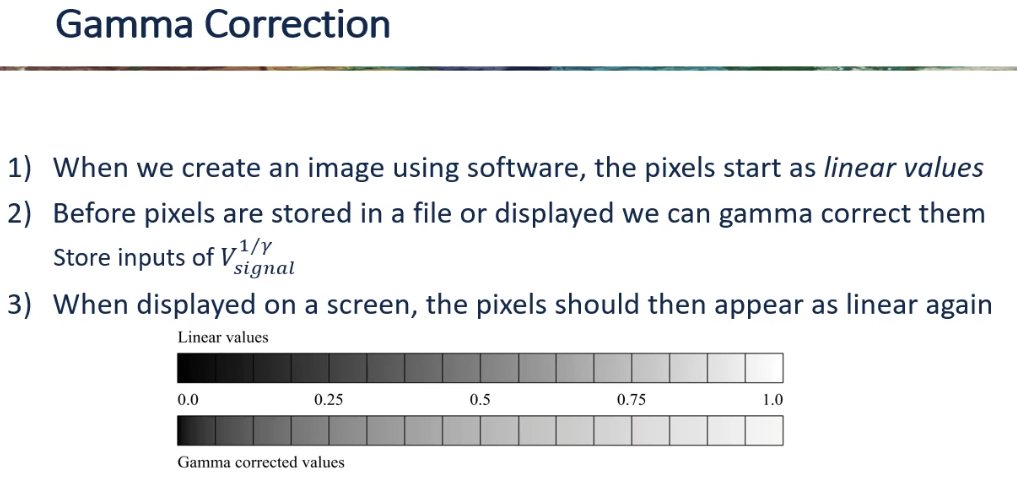
- 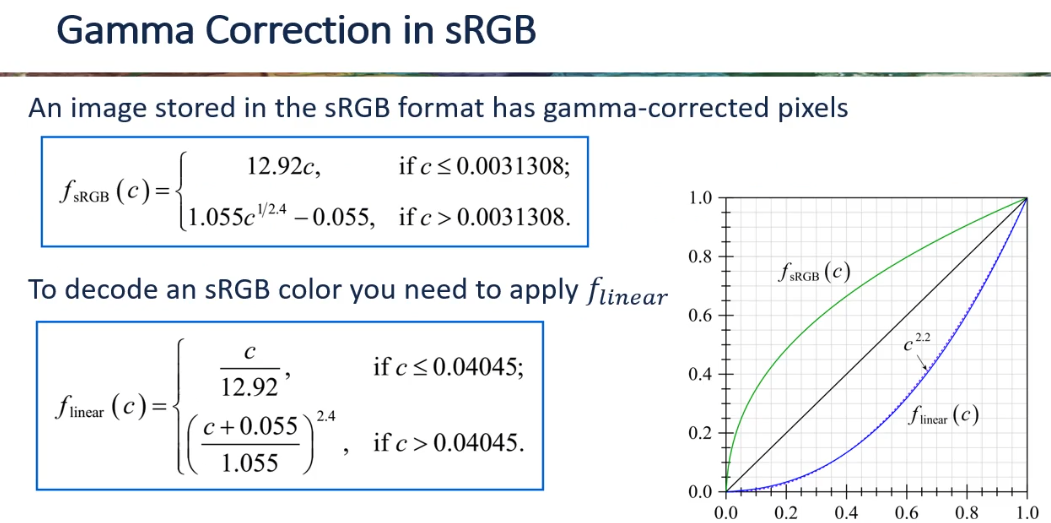
  - here is how we do gamma correction, and undo gamma correction to get the original intensity values
  - gamma correction brightens the image
- You usually do not need to gamma correct an image you create
- when saving an image, the library code will apply gamma correction
- when displaying an image you create in a browswer, it is not clear what to do
  - probably best to not do anything
  - if it seems like they are dark, you could apply gamma correction
  - or just use a control within the web page to allow the user to adjust the gamma
- If you are working with stored images, you need to remove the gamma correction before working with pixels
  - just be careful, and understand if the image is gamma corrected or not
- if the visualization requires you to have a precise understanding of pixel intensities, be careful
  - you do not want gamma correction of lack of gamma correction to make things difficult to read
- Why do modern displays still use gamma?
  - legacy maybe?
  - human vision has trouble differentiating bright intensities
  - implies that we should allocate more precision to lower intensities when downsampling
    - suppose we are downsampling
    - target space can represent only 6 values: 0,.2,.4,.6,.8, 1
    - procedure is
      - gamma correct raw value x
      - round to closest value of the 6 we can represent
    - 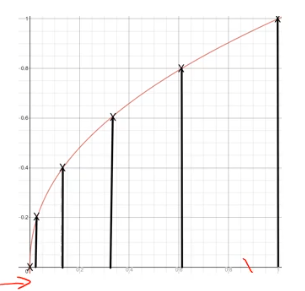
    - raw values on the x axis
    - y values shows corrected gamma values
    - gamma corrected values get rounded to a representative
    - .. we can drop lines from representatives down to the x axis and see that we are more densely sampling darker values
    - ie: darker shades have less error when encoded compared to brighter ones. This makes sense because we can't really tell the difference between the brighter ones anyway!